#### Handling Imbalanced Dataset with Machine Learning

In [ ]:
import pandas as pd
df=pd.read_csv('ais_disabling_events_main_only_imp_col_csv.csv')
df.head()

,vessel_class,gap_hours,iuu_caught,spherical_distances,eez_check,Ocean List New whose false were in OG
0,other,13.016667,0,207.942845,0,atlantic
1,other,13.850000,0,9.704232,0,atlantic
2,other,33.733333,0,10.789069,1,atlantic
3,other,30.650000,0,11.695860,1,atlantic
4,other,50.283333,0,93.113335,1,atlantic


In [ ]:
df.shape

(55141, 6)

In [ ]:
df['iuu_caught'].value_counts()

0    55041
1      100
Name: iuu_caught, dtype: int64

In [ ]:
#### Independent and Dependent Features
X=df.drop("iuu_caught",axis=1)
y=df.iuu_caught

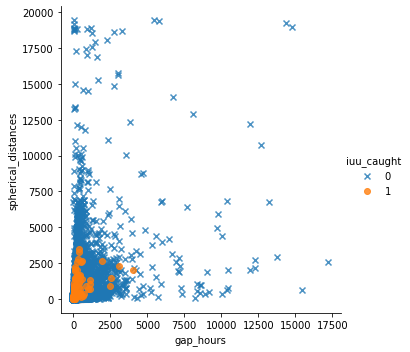

In [ ]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='spherical_distances', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=df)

### One Hot Encoding

In [ ]:
print(df['vessel_class'].unique())
print(df['Ocean List New whose false were in OG'].unique())

['other' 'trawlers' 'squid_jigger' 'tuna_purse_seines'
 'drifting_longlines']
['atlantic' 'southern' 'mediterranean' 'arctic' 'pacific' 'indian']


In [ ]:
print(df['vessel_class'].value_counts())
print(df['Ocean List New whose false were in OG'].value_counts())

drifting_longlines    18608
squid_jigger          15965
tuna_purse_seines      8620
trawlers               7865
other                  4083
Name: vessel_class, dtype: int64
pacific          31870
atlantic         16469
indian            6176
arctic             499
southern           116
mediterranean       11
Name: Ocean List New whose false were in OG, dtype: int64


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['vessel_class', 'Ocean List New whose false were in OG'])
print(one_hot_encoded_data.head())

   gap_hours  iuu_caught  spherical_distances  eez_check  \
0  13.016667           0           207.942845          0   
1  13.850000           0             9.704232          0   
2  33.733333           0            10.789069          1   
3  30.650000           0            11.695860          1   
4  50.283333           0            93.113335          1   

   vessel_class_drifting_longlines  vessel_class_other  \
0                                0                   1   
1                                0                   1   
2                                0                   1   
3                                0                   1   
4                                0                   1   

   vessel_class_squid_jigger  vessel_class_trawlers  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4              

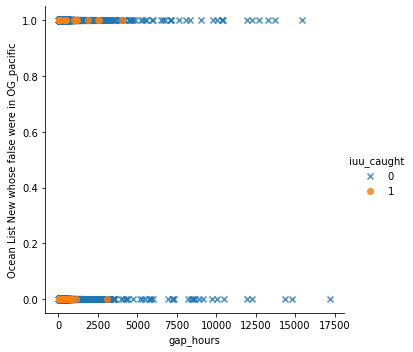

In [ ]:
import seaborn as sns

sns.lmplot(x='gap_hours', y='Ocean List New whose false were in OG_pacific', hue='iuu_caught', 
           markers=['x', 'o'],
           fit_reg=False, data=one_hot_encoded_data)

<ipython-input-75-d755c1f20fae>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


Correlation matrix is : 
                     gap_hours  iuu_caught  spherical_distances  eez_check
gap_hours             1.000000    0.026583             0.382565   0.017742
iuu_caught            0.026583    1.000000             0.031159   0.018025
spherical_distances   0.382565    0.031159             1.000000   0.031658
eez_check             0.017742    0.018025             0.031658   1.000000


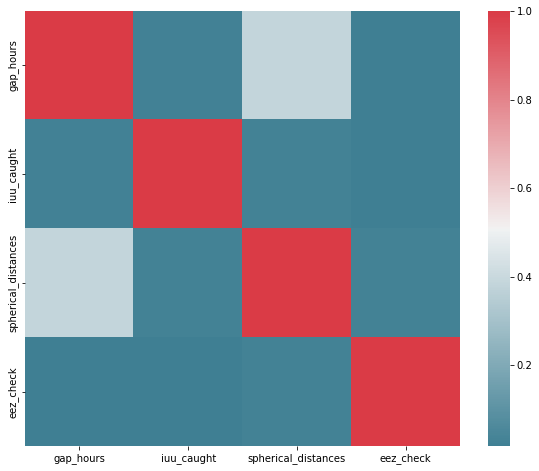

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


matrix = df.corr()
print("Correlation matrix is : ")
print(matrix)

In [ ]:
#### Independent and Dependent Features
X=one_hot_encoded_data.drop("iuu_caught",axis=1)
y=one_hot_encoded_data.iuu_caught

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    33024
1       60
Name: iuu_caught, dtype: int64

In [ ]:
print(len(X.columns))
n_inputs=14

14


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
# define model

model = keras.Sequential([
        keras.layers.Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

# model = Sequential()
# # define first hidden layer and visible layer
# model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# # define output layer
# model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1034/1034 [==============================] - 3s 3ms/step - loss: 0.8169
Epoch 2/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.2032
Epoch 3/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.1808
Epoch 4/10
1034/1034 [==============================] - 3s 3ms/step - loss: 0.2031
Epoch 5/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.1878
Epoch 6/10
1034/1034 [==============================] - 3s 2ms/step - loss: 0.0658
Epoch 7/10
1034/1034 [==============================] - 3s 2ms/step - loss: 0.1205
Epoch 8/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.1358
Epoch 9/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.0552
Epoch 10/10
1034/1034 [==============================] - 2s 2ms/step - loss: 0.0471


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred1=model.predict(X_test)

print(roc_auc_score(y_test,y_pred1))

690/690 [==============================] - 1s 2ms/step
0.5460053594949357


In [ ]:
y_pred1

array([[2.0537255e-02],
       [2.3913993e-13],
       [3.1068514e-04],
       ...,
       [1.9144217e-03],
       [3.3253599e-02],
       [1.2760095e-03]], dtype=float32)

In [ ]:
weights_assigned={0:1,1:550}

In [ ]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# define output layer
model.add(Dense(1, activation='sigmoid'))
# define loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
1034/1034 [==============================] - 3s 2ms/step - loss: 37.4886
Epoch 2/10
1034/1034 [==============================] - 2s 2ms/step - loss: 15.8369
Epoch 3/10
1034/1034 [==============================] - 2s 2ms/step - loss: 16.9952
Epoch 4/10
1034/1034 [==============================] - 2s 2ms/step - loss: 19.4063
Epoch 5/10
1034/1034 [==============================] - 2s 2ms/step - loss: 14.6230
Epoch 6/10
1034/1034 [==============================] - 2s 2ms/step - loss: 20.8670
Epoch 7/10
1034/1034 [==============================] - 2s 2ms/step - loss: 8.1093
Epoch 8/10
1034/1034 [==============================] - 2s 2ms/step - loss: 20.9339
Epoch 9/10
1034/1034 [==============================] - 3s 2ms/step - loss: 8.3225
Epoch 10/10
1034/1034 [==============================] - 3s 2ms/step - loss: 12.9097


In [ ]:
y_pred=model.predict(X_test)

690/690 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.7615456238361267